In [164]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk import FreqDist
import math
from sklearn.metrics.pairwise import cosine_similarity
import re 
import heapq
import numpy as np
from sklearn.preprocessing import normalize
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics.pairwise import linear_kernel
from spacy.matcher import Matcher
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, MaxAbsScaler
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
#nltk.download()

In [142]:
#https://medium.com/@deangelaneves/how-to-build-a-search-engine-from-scratch-in-python-part-1-96eb240f9ecb
def normalized_term_frequency(word, document):

    raw_frequency = document.count(word)

    if raw_frequency == 0:

        return 0

    return 1 + math.log(raw_frequency)

def docs_contain_word(word, documents):

    counter = 0

    for document in list_of_documents:

        if word in document:

            counter+=1

    return counter



def get_vocabulary(documents):

    vocabulary = set([word for document in documents for word in document])	

    return vocabulary



def inverse_document_frequency(documents, vocabulary):

    idf = {}

    for word in vocabulary:

        contains_word = docs_contain_word(word, documents)

        idf[word] = 1 + math.log(len(documents)/(contains_word))
    return idf

def tf_idf(search_keys, dataframe, label):

    tfidf_vectorizer = TfidfVectorizer()
    
    #fit_transform method converts the given text into TF-IDF scores for all the documents. 

    tfidf_weights_matrix = tfidf_vectorizer.fit_transform(dataframe.loc[:, label])

    search_query_weights = tfidf_vectorizer.transform([search_keys])


    return search_query_weights, tfidf_weights_matrix

def cos_similarity(search_query_weights, tfidf_weights_matrix):


    cosine_distance = cosine_similarity(query, tfidf_matrix)

    similarity_list = cosine_distance[0]

  
    return similarity_list

def most_similar(similarity_list, min_talks=1):

    most_similar= []

  

    while min_talks > 0:

        tmp_index = np.argmax(similarity_list)

        most_similar.append(tmp_index)

        similarity_list[tmp_index] = 0

        min_talks -= 1

    return most_similar

def word_count(string) :
    words= string.split()
    return len(words)


def avg_word_length(x):
    words=x.split()
    word_lengths= [len(word) for word in words]

    avg_word_length= sum(word_lengths)/len(words)
    return(avg_word_length)

In [93]:
paragraph="Herbert Simon research and concepts increased computer scientist understanding of reasoning and increased the computer's ability too solve problems and proof theorems . Herbert Simon , Al Newell , Clifford Shaw proposals were radical and affect computer scientist today . In Simon’s book , “Models of my life” , Simon demonstrated the Logical Theorem algorithm could prove certain mathematical theorems . Simon said , “This was the task to get a system to discover proof for a theorem , not simply to test the proof . We picked logic just because I happened to have Principia Mathematica sitting on my shelf and I was using it to see what was involved in finding a proof of anything . ” Alfred North Whitehead and Bertrand Russell book Principia Mathematica contained theorems considered to form the foundation of mathematical logic . Simeon evolved Logic theorem into General problem solver . GPS is currently used in robotics and gives the robot amazing problem solving capabilities . Many mathematicians considered some of LTs proofs superior to those previously published"

sentences = nltk.sent_tokenize(paragraph)

words=[]
for sentence in sentences:
    word_list=nltk.word_tokenize(sentence)
    
    #print(word_list)
    for i in range(0, len(word_list)-1):
        words.append(word_list[i])
    
print(words)


['Herbert', 'Simon', 'research', 'and', 'concepts', 'increased', 'computer', 'scientist', 'understanding', 'of', 'reasoning', 'and', 'increased', 'the', 'computer', "'s", 'ability', 'too', 'solve', 'problems', 'and', 'proof', 'theorems', 'Herbert', 'Simon', ',', 'Al', 'Newell', ',', 'Clifford', 'Shaw', 'proposals', 'were', 'radical', 'and', 'affect', 'computer', 'scientist', 'today', 'In', 'Simon', '’', 's', 'book', ',', '“', 'Models', 'of', 'my', 'life', '”', ',', 'Simon', 'demonstrated', 'the', 'Logical', 'Theorem', 'algorithm', 'could', 'prove', 'certain', 'mathematical', 'theorems', 'Simon', 'said', ',', '“', 'This', 'was', 'the', 'task', 'to', 'get', 'a', 'system', 'to', 'discover', 'proof', 'for', 'a', 'theorem', ',', 'not', 'simply', 'to', 'test', 'the', 'proof', 'We', 'picked', 'logic', 'just', 'because', 'I', 'happened', 'to', 'have', 'Principia', 'Mathematica', 'sitting', 'on', 'my', 'shelf', 'and', 'I', 'was', 'using', 'it', 'to', 'see', 'what', 'was', 'involved', 'in', 'fin

In [94]:
def return_weights(vocab, original_vocab, vector, vector_index):
    zipped = dict(zip(vector[vector_index].indices, vector[vector_index].data))
    
    # Let's transform that zipped dict into a series
    zipped_series = pd.Series({vocab[i]:zipped[i] for i in vector[vector_index].indices})
    
    # Let's sort the series to pull out the top n weighted words
    zipped_index = zipped_series.sort_values(ascending=False).index

    return [original_vocab[i] for i in zipped_index]

In [168]:
NUMERIC_COLUMNS=[]
LABELS=[]
def combine_text_columns(data_frame, to_drop=NUMERIC_COLUMNS + LABELS):
    """ converts all text in each row of data_frame to single vector """
    
    # Drop non-text columns that are in the df
    to_drop = set(to_drop) & set(data_frame.columns.tolist())
    text_data =data_frame.drop(to_drop,axis=1)
    
    # Replace nans with blanks
    text_data.fillna("",inplace=True)
    
    # Join all text items in a row that have a space in between
    return text_data.apply(lambda x: " ".join(x), axis=1)


get_text_data=FunctionTransformer(combine_text_columns,validate=False)

#("tfidf1", TfidfTransformer(use_idf=True,smooth_idf=True)),
#('clf', MultinomialNB(alpha=1)) #Laplace smoothing
pipeline = Pipeline([
    ('vect', CountVectorizer(stop_words='english',lowercase=True)),
    ("tfidf1", TfidfTransformer()),
    ##('vectorizer',TfidfVectorizer(stop_words='english')),
    ##('chi', SelectKBest()),
    
     ('scale', MaxAbsScaler()),
    ('clf', LogisticRegression(C=1e5)),
    #('clf', MultinomialNB()) 
    #('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
])

In [169]:
#print(paragraph)

sentences = nltk.sent_tokenize(paragraph)

tfidf_vec = TfidfVectorizer(stop_words='english')
text_tfidf = tfidf_vec.fit_transform(sentences)

shape=text_tfidf.get_shape()
vocab= {v:k for k,v in tfidf_vec.vocabulary_.items()}

df=pd.DataFrame(columns=['Index','Text','Tfidf','Target'])
for index in np.arange(shape[0]):
    weights=return_weights(vocab,tfidf_vec.vocabulary_,text_tfidf,index)
    target=vocab.get(np.max(weights))
    index=len(df)
    #df.loc[index]=[text_tfidf[index].toarray(),target]
    df.loc[index]=[index,sentences[index],text_tfidf[index].toarray(),target]

df.set_index('Index')
print(df.head(10))    

#X=df[['Index','Text']].values
#y=df['Target'].values.astype(str)

encoder = LabelEncoder()
df['Target']=encoder.fit_transform(df['Target'])

train,test=train_test_split(df,test_size=.6,random_state=42, shuffle=True)
pipeline.fit(train['Text'],train['Target'])

predictions=pipeline.predict(test['Text'])
print(test['Target'],predictions)

score = f1_score(test['Target'],predictions,pos_label='positive',average='micro')
print("score of Naive Bayes algo is :" , score)

#k_fold = KFold(n_splits=6)    
#scores=[]
#for train_indices,test_indices in k_fold.split(df):
#    train_text=df.iloc[train_indices]['Text'].values
#    train_y=df.iloc[train_indices]['Target'].values.astype(str)
    
#    test_text=df.iloc[test_indices]['Text'].values
#    test_y=df.iloc[test_indices]['Target'].values.astype(str)
#    pipeline.fit(train_text,train_y)
#    predictions=pipeline.predict(test_text)
    #print(predictions)
    #score = pipeline['clf'].score(test_text, test_y)
#    print(test_y,predictions)
#    score = f1_score(test_y,predictions,pos_label='positive',average='micro')
#    print("score of Naive Bayes algo is :" , score)
#    scores.append(score)

#X=df['X']
#y=pd.get_dummies(df['Target'])
#print(X,y)    

#nb=MultinomialNB()
#X_train,y_train,X_test,y_test=train_test_split(X,y,stratify=y)
#pipeline.fit(X,y)

  Index                                               Text  \
0     0  Herbert Simon research and concepts increased ...   
1     1  Herbert Simon , Al Newell , Clifford Shaw prop...   
2     2  In Simon’s book , “Models of my life” , Simon ...   
3     3  Simon said , “This was the task to get a syste...   
4     4  We picked logic just because I happened to hav...   
5     5  ” Alfred North Whitehead and Bertrand Russell ...   
6     6  Simeon evolved Logic theorem into General prob...   
7     7  GPS is currently used in robotics and gives th...   
8     8  Many mathematicians considered some of LTs pro...   

                                               Tfidf         Target  
0  [[0.24412135013075287, 0.0, 0.0, 0.0, 0.0, 0.0...  understanding  
1  [[0.0, 0.30771210180770386, 0.3077121018077038...          today  
2  [[0.0, 0.0, 0.0, 0.0, 0.29894865038661705, 0.0...       theorems  
3  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...        theorem  
4  [[0.0, 0.0, 0.0, 0.0, 0.0,

C:\Users\dnishimoto.BOISE\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [170]:
print(type(sentences))
index=np.arange(0, len(sentences))
df=pd.DataFrame({'sentence':sentences})
df.set_index(index)

df['word_count']=df['sentence'].apply(word_count)
df['avg_word_length']=df['sentence'].apply(avg_word_length)
print(df.head())
print(df.shape)

#a,b=tf_idf (pd.Series(['Herbert']),df,'Herbert')


<class 'list'>
                                            sentence  word_count  \
0  Herbert Simon research and concepts increased ...          23   
1  Herbert Simon , Al Newell , Clifford Shaw prop...          17   
2  In Simon’s book , “Models of my life” , Simon ...          21   
3  Simon said , “This was the task to get a syste...          25   
4  We picked logic just because I happened to hav...          32   

   avg_word_length  
0         6.347826  
1         5.058824  
2         5.333333  
3         3.520000  
4         4.218750  
(9, 3)


In [171]:
nlp = spacy.load('en_core_web_sm')
stopwords=spacy.lang.en.stop_words.STOP_WORDS
doc=nlp(paragraph)
tokens=[token.text for token in doc]
#print(tokens)
lemmas =[token.lemma_ for token in doc]
lemmas =[lemma for lemma in lemmas
        if (lemma.isalpha() )
         and lemma not in stopwords
        ]
#print(lemmas)

paragraph2=' '.join(lemmas)
#print(paragraph2)

vectorizer= CountVectorizer()

bow_lem= vectorizer.fit_transform(lemmas)

#sparse array
print(bow_lem.toarray())

print(bow_lem.shape)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(99, 71)


In [172]:
def get_recommendations(title, cosine_sim, indices):
    # Get index of movie that matches title
    idx = indices[title]
    # Sort the movies based on the similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores for 10 most similar sentences
    sim_scores = sim_scores[1:4]
    # Get the movie indices
    sentence_indices = [i[0] for i in sim_scores]
    # Return the top 10 most similar movies
    return df['sentence'].iloc[sentence_indices]

index=np.arange(0, len(sentences))
df=pd.DataFrame({'sentence':sentences})
df.set_index(index)

#print(df)
df['word_count']=df['sentence'].apply(word_count)
df['avg_word_length']=df['sentence'].apply(avg_word_length)
#print(df.head())
#print(df.shape)

a_sentence=sentences[0]
print("SELECTED SENTENCE: " + a_sentence)


tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['sentence'])

# Convert matrix into a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray())
# Map the column names to vocabulary 
tfidf.columns = tfidf.get_feature_names()

#print("FEATURES: "+ str(tfidf.get_feature_names()[0:]))

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

indices = pd.Series(df.index, index=df['sentence']).drop_duplicates()

results=get_recommendations(a_sentence,cosine_sim,indices)

print("SIMILIAR SENTENCES: ")

for result in enumerate(results):
       print (result)

doc=nlp(paragraph)

matcher=Matcher(nlp.vocab)

pattern=[
    {'LOWER':'simon'}
    ,{'LOWER':'research'}
    ]

matcher.add('IPHONE_PATTERN',None,pattern)

matches=matcher(doc)

print(matches)

SELECTED SENTENCE: Herbert Simon research and concepts increased computer scientist understanding of reasoning and increased the computer's ability too solve problems and proof theorems .
SIMILIAR SENTENCES: 
(0, 'Herbert Simon , Al Newell , Clifford Shaw proposals were radical and affect computer scientist today .')
(1, 'Simon said , “This was the task to get a system to discover proof for a theorem , not simply to test the proof .')
(2, 'In Simon’s book , “Models of my life” , Simon demonstrated the Logical Theorem algorithm could prove certain mathematical theorems .')
[(9528407286733565721, 1, 3)]


In [173]:
doc=nlp(paragraph)
for token in doc:
    # Check if the next token's text equals '%'
    if token.text == 'Herbert':
        print(' Person found: ', token.text)
        


 Person found:  Herbert
 Person found:  Herbert


In [174]:
doc=nlp(paragraph)
for token in doc:
        #print(token.text, token.pos_)
        if token.dep_ != 'ROOT' and token.dep_ != 'ART' and token.dep_ != 'VERB ROOT':
            print(token.text, token.pos_, token.dep_, token.head.text)

Herbert PROPN compound Simon
Simon PROPN compound research
research NOUN nsubj increased
and CCONJ cc research
concepts NOUN conj research
computer NOUN compound scientist
scientist NOUN compound understanding
understanding NOUN dobj increased
of ADP prep understanding
reasoning NOUN pobj of
and CCONJ cc increased
increased VERB conj increased
the DET det computer
computer NOUN poss ability
's PART case computer
ability NOUN dobj increased
too ADV advmod solve
solve VERB amod problems
problems NOUN dobj increased
and CCONJ cc problems
proof NOUN amod theorems
theorems NOUN conj problems
. PUNCT punct increased
Herbert PROPN compound Simon
Simon PROPN nsubj were
, PUNCT punct Simon
Al PROPN compound Newell
Newell PROPN appos Simon
, PUNCT punct were
Clifford PROPN compound Shaw
Shaw PROPN compound proposals
proposals NOUN nsubj were
radical ADJ acomp were
and CCONJ cc were
affect VERB conj were
computer NOUN compound scientist
scientist NOUN dobj affect
today NOUN npadvmod affect
. PUNC

In [175]:
#part of speech
doc=nlp(paragraph)
pos=[(token.text, token.pos_) for token in doc]
print(pos)

#proper_noun=[word for word in pos if pos=='PROPN']
#print (proper_noun)

def find_nouns(text):
    # Create Doc object
    doc2 = nlp(text)
  
    # Identify the persons
    nouns = [token.text for token in doc if token.pos_ == 'PROPN' or 'NOUN']
  
    # Return persons
    return nouns

nouns=find_nouns(paragraph)
print(nouns)

[('Herbert', 'PROPN'), ('Simon', 'PROPN'), ('research', 'NOUN'), ('and', 'CCONJ'), ('concepts', 'NOUN'), ('increased', 'VERB'), ('computer', 'NOUN'), ('scientist', 'NOUN'), ('understanding', 'NOUN'), ('of', 'ADP'), ('reasoning', 'NOUN'), ('and', 'CCONJ'), ('increased', 'VERB'), ('the', 'DET'), ('computer', 'NOUN'), ("'s", 'PART'), ('ability', 'NOUN'), ('too', 'ADV'), ('solve', 'VERB'), ('problems', 'NOUN'), ('and', 'CCONJ'), ('proof', 'NOUN'), ('theorems', 'NOUN'), ('.', 'PUNCT'), ('Herbert', 'PROPN'), ('Simon', 'PROPN'), (',', 'PUNCT'), ('Al', 'PROPN'), ('Newell', 'PROPN'), (',', 'PUNCT'), ('Clifford', 'PROPN'), ('Shaw', 'PROPN'), ('proposals', 'NOUN'), ('were', 'AUX'), ('radical', 'ADJ'), ('and', 'CCONJ'), ('affect', 'VERB'), ('computer', 'NOUN'), ('scientist', 'NOUN'), ('today', 'NOUN'), ('.', 'PUNCT'), ('In', 'ADP'), ('Simon', 'PROPN'), ('’s', 'PART'), ('book', 'NOUN'), (',', 'PUNCT'), ('“', 'PUNCT'), ('Models', 'NOUN'), ('of', 'ADP'), ('my', 'DET'), ('life', 'NOUN'), ('”', 'PUNCT'

In [176]:
named_entity=[(entity.text,entity.label_) for entity in doc.ents]
print(named_entity)

def find_persons(text):
    # Create Doc object
    doc2 = nlp(text)
  
    # Identify the persons
    persons = [ent.text for ent in doc2.ents if ent.label_ == 'PERSON']
  
    # Return persons
    return persons

persons=find_persons(paragraph)
print(persons)



[('Herbert Simon', 'PERSON'), ('Herbert Simon', 'PERSON'), ('Al Newell', 'PERSON'), ('Clifford Shaw', 'PERSON'), ('today', 'DATE'), ('Simon', 'PERSON'), ('Simon', 'PERSON'), ('the Logical Theorem', 'ORG'), ('Simon', 'PERSON'), ('Principia Mathematica', 'PERSON'), ('Alfred North Whitehead', 'PERSON'), ('Bertrand Russell', 'PERSON'), ('Principia Mathematica', 'PERSON')]
['Herbert Simon', 'Herbert Simon', 'Al Newell', 'Clifford Shaw', 'Simon', 'Simon', 'Simon', 'Principia Mathematica', 'Alfred North Whitehead', 'Bertrand Russell', 'Principia Mathematica']


In [177]:
sentences_series = pd.Series(sentences)

print(sentences_series)

#vectorizer= CountVectorizer()
vectorizer=CountVectorizer(strip_accents='ascii', stop_words='english', lowercase=False)

bow_matrix= vectorizer.fit_transform(sentences_series)

print(bow_matrix.toarray())


0    Herbert Simon research and concepts increased ...
1    Herbert Simon , Al Newell , Clifford Shaw prop...
2    In Simon’s book , “Models of my life” , Simon ...
3    Simon said , “This was the task to get a syste...
4    We picked logic just because I happened to hav...
5    ” Alfred North Whitehead and Bertrand Russell ...
6    Simeon evolved Logic theorem into General prob...
7    GPS is currently used in robotics and gives th...
8    Many mathematicians considered some of LTs pro...
dtype: object
[[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 2 1 0
  0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0
  1 0 0 0 0 0 0 1 0 1 0 0]
 [1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0
  0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0
  0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0

In [178]:
# Create a TfidfVectorizer: tfidf
vectorizer = TfidfVectorizer() 

# Apply fit_transform to document: csr_mat
csr_matrix = vectorizer.fit_transform(sentences)

#print(csr_mat)

print(vectorizer.get_feature_names())

print(csr_matrix.toarray())

['ability', 'affect', 'al', 'alfred', 'algorithm', 'amazing', 'and', 'anything', 'because', 'bertrand', 'book', 'capabilities', 'certain', 'clifford', 'computer', 'concepts', 'considered', 'contained', 'could', 'currently', 'demonstrated', 'discover', 'evolved', 'finding', 'for', 'form', 'foundation', 'general', 'get', 'gives', 'gps', 'happened', 'have', 'herbert', 'in', 'increased', 'into', 'involved', 'is', 'it', 'just', 'life', 'logic', 'logical', 'lts', 'many', 'mathematica', 'mathematical', 'mathematicians', 'models', 'my', 'newell', 'north', 'not', 'of', 'on', 'picked', 'previously', 'principia', 'problem', 'problems', 'proof', 'proofs', 'proposals', 'prove', 'published', 'radical', 'reasoning', 'research', 'robot', 'robotics', 'russell', 'said', 'scientist', 'see', 'shaw', 'shelf', 'simeon', 'simon', 'simply', 'sitting', 'solve', 'solver', 'solving', 'some', 'superior', 'system', 'task', 'test', 'the', 'theorem', 'theorems', 'this', 'those', 'to', 'today', 'too', 'understanding'

In [179]:
model = NMF(n_components=6)

csr_matrix = vectorizer.fit_transform(sentences)
# Fit the model to articles
model.fit(csr_matrix)

# Transform the articles: nmf_features
nmf_features = model.transform(csr_matrix)

#print(len(nmf_features))
# Print the NMF features
#print(nmf_features)


norm_features = normalize(nmf_features)

current_sentence= norm_features[1,:]

similarities=norm_features.dot(current_sentence)
print(similarities)


#print(similarities.nlargest())

#cosine_sim=cosine_similarity(csr_matrix, csr_matrix)

#print(cosine_sim)

cosine_sim= linear_kernel(csr_matrix,csr_matrix)

print(cosine_sim)


[0.99551016 1.         0.         0.00295036 0.         0.
 0.         0.         0.        ]
[[1.         0.26783465 0.11787934 0.10756047 0.08121546 0.12746356
  0.         0.08381288 0.02236045]
 [0.26783465 1.         0.06498544 0.02803232 0.01945149 0.0259088
  0.         0.02814703 0.        ]
 [0.11787934 0.06498544 1.         0.12542881 0.08459516 0.18708746
  0.0550844  0.06741761 0.02757828]
 [0.10756047 0.02803232 0.12542881 1.         0.23125281 0.1183672
  0.04752275 0.0445903  0.08964417]
 [0.08121546 0.01945149 0.08459516 0.23125281 1.         0.18558371
  0.04141486 0.05068751 0.07281629]
 [0.12746356 0.0259088  0.18708746 0.1183672  0.18558371 1.
  0.05516334 0.05175942 0.12107576]
 [0.         0.         0.0550844  0.04752275 0.04141486 0.05516334
  1.         0.07927305 0.        ]
 [0.08381288 0.02814703 0.06741761 0.0445903  0.05068751 0.05175942
  0.07927305 1.         0.        ]
 [0.02236045 0.         0.02757828 0.08964417 0.07281629 0.12107576
  0.         0. 

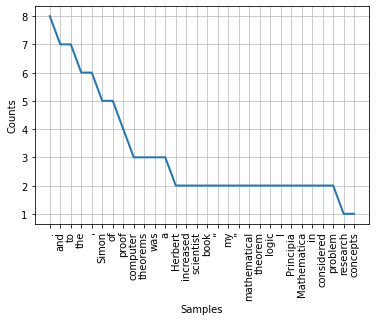

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [180]:

tokens = sum([word_tokenize(sentence) for sentence in sentences], [])

words_frequency = FreqDist(tokens)

words_frequency.plot(30, cumulative = False)

In [181]:
#https://medium.com/analytics-vidhya/implementing-the-tf-idf-search-engine-5e9a42b1d30b

   
corpus = nltk.sent_tokenize(paragraph)    


for i in range(len(corpus )):
    corpus [i] = corpus [i].lower()
    corpus [i] = re.sub(r'\W',' ',corpus [i])
    corpus [i] = re.sub(r'\s+',' ',corpus [i])

#print(corpus)

wordfreq = {}
for sentence in corpus:
    tokens = nltk.word_tokenize(sentence)
    for token in tokens:
        if token not in wordfreq.keys():
            wordfreq[token] = 1
        else:
            wordfreq[token] += 1

print(wordfreq)

#most_freq = heapq.nlargest(200, wordfreq, key=wordfreq.get)

sentence_vectors = []
for sentence in corpus:
    sentence_tokens = nltk.word_tokenize(sentence)
    sent_vec = []
    #for token in most_freq:
    for token in wordfreq:
        if token in sentence_tokens:
            sent_vec.append(1)
        else:
            sent_vec.append(0)
    sentence_vectors.append(sent_vec)

sentence_vectors = np.asarray(sentence_vectors)

print(sentence_vectors)

{'herbert': 2, 'simon': 5, 'research': 1, 'and': 7, 'concepts': 1, 'increased': 2, 'computer': 3, 'scientist': 2, 'understanding': 1, 'of': 5, 'reasoning': 1, 'the': 6, 's': 2, 'ability': 1, 'too': 1, 'solve': 1, 'problems': 1, 'proof': 4, 'theorems': 3, 'al': 1, 'newell': 1, 'clifford': 1, 'shaw': 1, 'proposals': 1, 'were': 1, 'radical': 1, 'affect': 1, 'today': 1, 'in': 3, 'book': 2, 'models': 1, 'my': 2, 'life': 1, 'demonstrated': 1, 'logical': 1, 'theorem': 3, 'algorithm': 1, 'could': 1, 'prove': 1, 'certain': 1, 'mathematical': 2, 'said': 1, 'this': 1, 'was': 3, 'task': 1, 'to': 7, 'get': 1, 'a': 3, 'system': 1, 'discover': 1, 'for': 1, 'not': 1, 'simply': 1, 'test': 1, 'we': 1, 'picked': 1, 'logic': 3, 'just': 1, 'because': 1, 'i': 2, 'happened': 1, 'have': 1, 'principia': 2, 'mathematica': 2, 'sitting': 1, 'on': 1, 'shelf': 1, 'using': 1, 'it': 1, 'see': 1, 'what': 1, 'involved': 1, 'finding': 1, 'anything': 1, 'alfred': 1, 'north': 1, 'whitehead': 1, 'bertrand': 1, 'russell': 1

In [182]:
#takes a long time to run
nlp=spacy.load('en_core_web_lg')
doc2=nlp(paragraph)
doc=nlp('I am happy')

#for token in doc2:
#    print(token.vector)
    
    
#doc3=nlp("happy joyous sad")  
         
#for token1 in doc3:
#    for token2 in doc2:
#        print(token1.text,token2.text,token1.similarity(token2))

doc3=nlp("computing mathematics theorm")  

for token1 in doc3:
    for token2 in doc2:
        print(token1.text,token2.text,token1.similarity(token2))
        
        

computing Herbert 0.07276924
computing Simon 0.05576835
computing research 0.40343753
computing and 0.1943571
computing concepts 0.45711964
computing increased 0.24925496
computing computer 0.6224965
computing scientist 0.2660795
computing understanding 0.38134873
computing of 0.24522913
computing reasoning 0.30303115
computing and 0.1943571
computing increased 0.24925496
computing the 0.22144683
computing computer 0.6224965
computing 's 0.1260481
computing ability 0.30118415
computing too 0.16354746
computing solve 0.3485522
computing problems 0.27601594
computing and 0.1943571
computing proof 0.18525296
computing theorems 0.23384278
computing . 0.1465077
computing Herbert 0.07276924
computing Simon 0.05576835
computing , 0.18776377
computing Al 0.059818372
computing Newell -0.0047686454
computing , 0.18776377
computing Clifford 0.020007184
computing Shaw 0.07874915
computing proposals 0.1906419
computing were 0.088380806
computing radical 0.18658942
computing and 0.1943571
computing 

theorm was -0.16673209
theorm involved -0.098828144
theorm in -0.21266408
theorm finding -0.10688144
theorm a -0.22609198
theorm proof 0.040265605
theorm of -0.21583192
theorm anything -0.16286898
theorm . -0.23462069
theorm ” -0.116432816
theorm Alfred 0.10705631
theorm North -0.09030698
theorm Whitehead 0.2551702
theorm and -0.3065261
theorm Bertrand 0.2621902
theorm Russell 0.13710104
theorm book -0.2318929
theorm Principia 0.26924914
theorm Mathematica 0.3122619
theorm contained -0.063795075
theorm theorems 0.34822604
theorm considered -0.1697552
theorm to -0.22422731
theorm form -0.16259058
theorm the -0.23179406
theorm foundation 0.02598746
theorm of -0.21583192
theorm mathematical 0.11343587
theorm logic -0.04283431
theorm . -0.23462069
theorm Simeon 0.26194298
theorm evolved -0.090613455
theorm Logic -0.04283431
theorm theorem 0.39093226
theorm into -0.23217069
theorm General -0.18473692
theorm problem -0.07620558
theorm solver 0.15412886
theorm . -0.23462069
theorm GPS -0.0417

In [183]:
def listToString(s):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string   
    return (str1.join(s)) 

In [184]:
index=np.arange(0,len(sentences))
wordfreq = dict()
bagList=[]
for i in index:
    sentence=sentences[i]
    if(len(sentence)>0):
        tokens=sum([word_tokenize(sentence)],[])
        #print(sentences[i])
        #print(tokens)
        #print(index[i])
        words_frequency = FreqDist(tokens)
        #words_frequency.plot(30, cumulative = False)
        wordfreq=dict()
        for token in tokens:
            if token not in wordfreq.keys():
                wordfreq[token] = 1
            else:
                wordfreq[token] += 1
            #print(wordfreq)
        bagList.append({'words': wordfreq})

In [185]:
uncommon=dict()

#breakfor i in np.arange(0,len(bagList)):
for dictionaryItem in bagList:
    words=dictionaryItem['words']
    for key,(word,count) in enumerate(words.items()):
        if word in uncommon:
            uncommon[word]+=1
        else:
            uncommon[word]=1

uncommon = {key: value for key, value in uncommon.items() if (value<=3 )}   

In [186]:
for dictionaryItem in bagList:
    words=[]
    wordPair=dictionaryItem['words']
    for key, value in enumerate(wordPair):
        #if(value<3):
        words.append(value)

    paragraph=listToString(words)
    #print(paragraph)
    
    nlp=spacy.load('en_core_web_sm')
  
    doc = nlp(paragraph)
    output=[]
    isEntity=False
    isUncommon=False
    for token in doc:
        flag=0
        entity_match=[(ent.text,ent.label_) for ent in doc.ents if token.text in ent.text]
        isEntity=(len(entity_match)>0)
        isUncommon=token.text in uncommon.keys()
        if  isEntity==False and isUncommon==False and len(token.text)>=4 and token.pos_=='PROPN':
            flag=1
                
        print(token.text,flag,"Entity:"+str(isEntity),"Uncommon:"+str(isUncommon),entity_match)
    
        if flag==1 :
            output.append('and \' \' + [SentenceValue]+\' \' like \'%'+token.text+' %\'')
    
    print (listToString(output))


Herbert 0 Entity:True Uncommon:True [('Herbert Simon', 'PERSON')]
Simon 0 Entity:True Uncommon:False [('Herbert Simon', 'PERSON')]
research 0 Entity:False Uncommon:True []
and 0 Entity:False Uncommon:False []
concepts 0 Entity:False Uncommon:True []
increased 0 Entity:False Uncommon:True []
computer 0 Entity:False Uncommon:True []
scientist 0 Entity:False Uncommon:True []
understanding 0 Entity:False Uncommon:True []
of 0 Entity:False Uncommon:False []
reasoning 0 Entity:False Uncommon:True []
the 0 Entity:False Uncommon:False []
's 0 Entity:False Uncommon:True []
ability 0 Entity:False Uncommon:True []
too 0 Entity:False Uncommon:True []
solve 0 Entity:False Uncommon:True []
problems 0 Entity:False Uncommon:True []
proof 0 Entity:False Uncommon:True []
theorems 0 Entity:False Uncommon:True []
. 0 Entity:False Uncommon:False []

Herbert 0 Entity:True Uncommon:True [('Herbert Simon', 'PERSON')]
Simon 0 Entity:True Uncommon:False [('Herbert Simon', 'PERSON')]
, 0 Entity:False Uncommon:Tr

In [187]:
def get_recommendations(title, cosine_sim, indices):
    # Get index of movie that matches title
    idx = indices[title]
    # Sort the movies based on the similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores for 10 most similar sentences
    sim_scores = sim_scores[1:10]
    # Get the movie indices
    sentence_indices = [i[0] for i in sim_scores]
    # Return the top 10 most similar movies
    return df['Sentence'].iloc[sentence_indices]
    #printreturn sentences[sentence_indices]


In [188]:
a_sentence=sentences[2] 
print(a_sentence)
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(sentences)
# Convert matrix into a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray())
# Map the column names to vocabulary 
tfidf.columns = tfidf.get_feature_names()

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)


df=pd.DataFrame()
#indices=np.arange(0,len(sentences))
df['Sentence']=sentences
indices = pd.Series(df.index, index=df['Sentence']).drop_duplicates()
results=get_recommendations(a_sentence,cosine_sim,indices)
for result in enumerate(results):
       print (result)

In Simon’s book , “Models of my life” , Simon demonstrated the Logical Theorem algorithm could prove certain mathematical theorems .
(0, '” Alfred North Whitehead and Bertrand Russell book Principia Mathematica contained theorems considered to form the foundation of mathematical logic .')
(1, 'Simon said , “This was the task to get a system to discover proof for a theorem , not simply to test the proof .')
(2, "Herbert Simon research and concepts increased computer scientist understanding of reasoning and increased the computer's ability too solve problems and proof theorems .")
(3, 'Herbert Simon , Al Newell , Clifford Shaw proposals were radical and affect computer scientist today .')
(4, 'Simeon evolved Logic theorem into General problem solver .')
(5, 'We picked logic just because I happened to have Principia Mathematica sitting on my shelf and I was using it to see what was involved in finding a proof of anything .')
(6, 'GPS is currently used in robotics and gives the robot amazi

In [189]:
def create_tokenizer_score(new_series, train_series, tokenizer):
    """
    return the tf idf score of each possible pairs of documents
    Args:
        new_series (pd.Series): new data (To compare against train data)
        train_series (pd.Series): train data (To fit the tf-idf transformer)
    Returns:
        pd.DataFrame
    """

    train_tfidf = tokenizer.fit_transform(train_series)
    new_tfidf = tokenizer.transform(new_series)
    X = pd.DataFrame(cosine_similarity(new_tfidf, train_tfidf), columns=train_series.index)
    X['ix_new'] = new_series.index
    score = pd.melt(
        X,
        id_vars='ix_new',
        var_name='ix_train',
        value_name='score'
    )
    return score

In [190]:
match_index=4
train_set=pd.Series(sentences)
test_set=pd.Series(sentences[match_index])
#print(train_set)
print(test_set)
tokenizer = TfidfVectorizer() # initiate here your own tokenizer (TfidfVectorizer, CountVectorizer, with stopwords...)
score = create_tokenizer_score(train_series=train_set, new_series=test_set, tokenizer=tokenizer)
#print(score)
index=0
matches=[]

for index in np.arange(0,len(score)):

    value=score.loc[index,'score']
    print (index,value)
    if value>0.10:
        matches.append(index)
        #matches.append(index)
        
print(matches)

0    We picked logic just because I happened to hav...
dtype: object
0 0.08121546496588868
1 0.019451491211043708
2 0.08459516431514912
3 0.23125281077112542
4 1.0
5 0.18558371020743689
6 0.04141486064131286
7 0.050687508053040675
8 0.07281629311343475
[3, 4, 5]
